# 📈 Regression problems


<center><img src="https://miro.medium.com/max/1400/1*BT-K3d_tspyeePbQzMzE7g.png"></center>


Linear Regression is a method used to define a relationship between a dependent variable $(Y)$ and independent variable $(X)$.

 Which is simply written as :

<center><img src="https://miro.medium.com/max/722/1*nejpuvlh1MbMGQtve_1ztQ.png"></center>

Where $y$ is the dependent variable, $m$ is the scale factor or coefficient, $b$ being the **bias coefficient** and $X$ being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between $X$ and $Y$ which estimates the relationship between $X$ and $Y$.

where:

- $y$ is the value we're trying to predict

- $m$ is the slope of the line.

- $x$ is our input feature.

- $b$ is the y-intercept.

By convention in machine learning, you'll write the equation for a model slightly differently:

$$\hat{y} = b + w_1 x_1$$

where:

- $\hat{y}$ is the predicted label (a desired output)
- $b$ is the bias (the y-intercept), sometimes referred to as $w_0$ .
- $w_1$ is the weight of feature 1. Weight is the same concept as the "slope" $m$ in the traditional equation of a line.
- $x_1$ is a feature (a known input).

In a more formal way, we note call that equation the hypothesis function :

- $$\hat{y} = h_{\theta}(X) = \theta_{0} + \theta_{1}X$$ 

$X$ could be a vector of $n$ features, such as  :

$$ h_{\theta}(X) = \sum_{j=0}^n \theta_{j}x_{j} \\$$ 

$$
\theta_{j}=\left[\begin{array}{c}
\theta_{0} \\
\vdots \\\\
\theta_{n} \\
\end{array}\right]
$$

In the case of **Simple Regression**, we have a parameters vector $\theta_{j}$ such as :


$$
 \theta_{j}=\left[
\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\end{array}\right]$$

<strong> The parameter $\theta$ is usually called the weight.</strong>

<h4  style="font-family: Arial; font-size:1.4em;color:gold;">But how do we find these parameters' coefficients ? </h4>

We can find these using different approaches. 

The goal is to choose $\theta$ such as $h_{\theta}(X) \approx y$ for training set.

This is usually done by the **Least Mean Square** Method approach and the Gradient Descent approach.

 We will be implementing the Ordinary Least Mean Square Method.


## The Mean Square Error

**The mean Square Error is also called a loss function.**

The linear regression models we'll examine here use a loss function called squared loss (also known as $L_2$ loss). The squared loss for a single example is as follows:

```
cost  = the square of the difference between the label and the prediction
cost  = (observation - prediction(x))²
cost  = (y - y')²
```


Mean square error (MSE) is the average squared loss per example over the whole dataset. 

To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

$$MSE = \frac{1}N \sum_{(x,y) \in D}(y - prediction(x))^2$$

Where :

- $(x,y)$ :
  - $x$ being set of features that the model used for predictions, 
  - $y$ is the example's label.
  
  
- $N$ : number of examples in dataset D

Although MSE is commonly-used in machine learning, it is neither the only practical loss function nor the best loss function for all circumstances.

In [ ]:
def mean_squared_error(y_true,y_hat):
  loss = y_hat - y_true
  return np.sum(loss ** 2) / (2 * len(y_true))

## Reducing Loss

To train a model, we need a good way to reduce the model’s loss. An iterative approach is one widely used method for reducing loss, and is as easy and efficient as walking down a hill.

<center><img src="https://developers.google.com/machine-learning/crash-course/images/GradientDescentDiagram.svg" width=850></center>

In order to get $\theta$ such as $h_{\theta}(X) \approx y$, we need to get the smallest MSE value, which is equivalent to finding the minimum of the loss function.

<p id="loss">We can define that loss function as : </p>

$$ J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2$$

$\theta$ is a $n$-dimension vector; the loss function is also going to be a $n$-dimension one.

*The loss function can also be called cost function.*


Reducing Loss is made using the **Gradient Descent** algorithm.

# 🎢 What is in the world Gradient ? 

Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.
A gradient for an $n$-dimensional function $f(x)$ at a given point p is defined as follows:



$$
\nabla f(p)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(p)\\\\\
\dfrac{\partial f}{\partial x_2}(p) \\\\\
\vdots \\\\
\dfrac{\partial f}{\partial x_n}(p) 
\end{array}\right]
$$

Let's consider the function bellow :
$$
f(x,y) = 0.5x^2 + y^2
$$

In [1]:
def f(x,y):
  return 0.5*x**2 + y**2

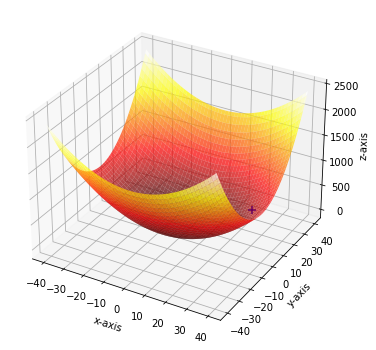

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,15))
ax = fig.gca(projection='3d')   # Create the axes

# Data
X = np.linspace(-40, 40, 100)
Y = np.linspace(-40, 40, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the 3d surface

surface = ax.plot_surface(X, Y, Z,                  
                          rstride = 2,
                          cstride = 2,
                          alpha = .7,
                          cmap=cm.hot, 
                          linewidth=0, 
                          antialiased=True)

ax.scatter(30,10,f(30,10), marker='+', zorder=10, c="b",s=50)


# Set some labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Let’s assume we are interested in a gradient at point $p(10,10)$:

$$
\dfrac{\partial f}{\partial x}(x,y)=x \\\\\\\\\\\
\\\\\

\dfrac{\partial f}{\partial y}(x,y)=2y\\

$$


$$
\nabla f(x,y)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(p) \\\\

\dfrac{\partial f}{\partial x_2}(p) 
\end{array}\right]
$$



so consequently:

$$\nabla f(x,y)=\left[\begin{array}{c}
 x \\
 2y \\

\end{array}\right]

\\\\\\
$$



$$
 \nabla f(10,10)=\left[
\begin{array}{c}
10 \\
20 \\
\end{array}\right]$$

By looking at these values we conclude that the slope is twice steeper along the y axis.


## Gradient Descent

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, then scales it (by a learning rate) and subtracts obtained value from the current position (makes a step).

It subtracts the value because we want to minimise the function (to maximise it would be adding). 
 
In our case,the function we would like to minimize and very frequently is the <a href="#loss">loss function</a>.
This process can be written as:

$$ \theta_{j} := \theta_{j} - \alpha\dfrac{\partial}{\partial \theta}J(\theta) $$


$$0 \leq j\leq n $$ 

 There’s an important parameter $\alpha$ which scales the gradient and thus controls the step size. 

In machine learning, it is called **learning rate** and have a strong influence on performance.

- The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point

- If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

<h4 id="gradient" style="font-family: Arial; font-size:1.4em;color:gold;"> How de we compute the Gradient of the loss function then ? </h4>

After defining the concepts above, we ended up with 3 main equations : 

The hypothesis equation :
$$
\hat{y} = h_{\theta}(X) = \theta X =  \theta_{0} + \theta_{1}X  \tag{1}
$$

The cost/loss function :
$$
 J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2  \tag{2}
$$

The gradient descent : 

$$
\theta_{j} := \theta_{j} - \alpha\dfrac{\partial}{\partial \theta}J(\theta)  \tag{3}
$$

By substituting $1^{st}$ in $2^{nd}$ and then $2^{nd}$ in $3^{rd}$, we get :


$$
\theta_{j} := \theta_{j} - \alpha\frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) X_{j}^\top \tag{4}
$$
In our Gradient Descent algorithm, we will repeat $(4)$ for $m$ samples in the training set, in each iteration $j$ until finding local minima.

The goal is to make it converge.


For a more intuitive notation, we can rewrite the hypothesis equation such as : 

$$
h_{\theta}(X) = \beta + \theta X  \tag{1}
$$

- $\beta$ being the bias (the y-intercept), sometimes referred to as $\theta_{0}$ 
- $\theta$ being the weight,
- $X$ the vector of features (from 1 to $n$)

In this notebook, we would like to predict the benefice of a firm in different towns by focusing on these towns' inhabitants.

To do so, we will study the case of a set of given data with :
- $y$ being the benefice,
- $X$ inhabitants features.

We'll be using **Gradient Descent** method for prediction.

# 1️⃣ Single-feature Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [4]:
df_houses = pd.read_csv('data/houses.csv')

In [5]:
df_houses.head()

,population,benefice
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   benefice    97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Defining X and y

In [7]:
X = df_houses['population'].values
X[:5]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [8]:
y = df_houses['benefice'].values
y[:5]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

Text(0, 0.5, 'Benefice x 1000')

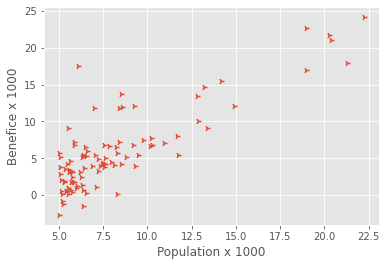

In [9]:
plt.scatter(X,y,marker="4")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')

We can clearly see that there may be a line passing through some these points.

In our first part of the work, we're going to find the parameters $(\theta_{0},\theta_{1})$ because the equation of the line is in the form of $y=\theta_{0} + \theta_{1}x$.

But how do we choose these values at the first iteration ? 
Generally, they are randomly generated or set to zero.


In [10]:
import random
def initialize(n_features: int, is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n_features has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    theta_0 = random.random()
    theta = np.random.rand(n_features)
  else:
    theta_0 = 0
    theta = np.zeros(shape=n_features)
  return theta_0,theta

Let's define as well a function to predict $Y$ (or $\hat{y}$).

In [11]:
def h_theta(X,theta):
  """
  This is the predict(X) function that returs y_hat.
  """
  return np.sum(np.multiply(X,theta), axis=1)

In [12]:
theta_0,theta_1 = initialize(X.shape[1],is_random=True)
theta_0,theta_1

IndexError: tuple index out of range

In [13]:
X.shape

(97,)

As you can see, this is raising an error because the shape of our features vector is $(97,)$.

- When it comes to Single-Feature Regression, we always ``reshape(-1,1)`` our features vector so it becomes a column-vector in order to make the dot product possible (used in LinearRegression() method of sckikit-learn)

Since the equation $y=\theta_{0} + \theta_{1}x$., $\theta_{0}$ is implicitly multiplied by 1. 

Put another way consider the $i^{th} (x,y)$ pair :

$$y^{(i)} = \theta_{0} + \theta_{1}x^{(i)} \iff y^{(i)} = \theta_{0} \times 1 + \theta_{1}x^{(i)} \\$$

- Another way of dealing with this problem is to add a column of ones to the single-feature X vector.

However, these two methods are not equivalent if we go by ploting two regression lines having the same parameters generated randomly.

In [14]:
X_reshaped = X.reshape(-1,1)
X_reshaped.shape

(97, 1)

In [15]:
theta_0, theta_1 = initialize(X_reshaped.shape[1],is_random=True)

In [16]:
theta = np.append(theta_0,theta_1)
print('bias = {}, weight = {}'.format(theta[0],theta[1]))

bias = 0.03975387434620281, weight = 0.7882859418605562


In [17]:
X_stacked = np.vstack((np.ones(len(y)), X.T)).T
X_stacked.shape

(97, 2)

In [18]:
y_pred_reshaped = h_theta(X_reshaped,theta)
y_pred_stacked = h_theta(X_stacked,theta)

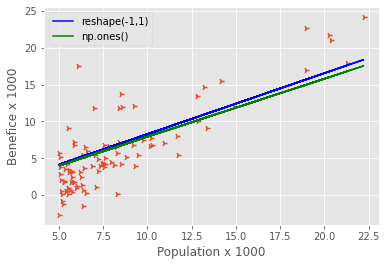

In [19]:
plt.scatter(x=df_houses['population'],y=df_houses['benefice'],marker="4")
plt.plot(X,y_pred_reshaped,c='blue',label="reshape(-1,1)")
plt.plot(X,y_pred_stacked,c='green',label="np.ones()")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

The ``np.ones()`` method however *"touches"* more points.

 We're going to work with that method then.

In [20]:
df_houses.shape

(97, 2)

In [21]:
intercept = np.ones(len(y))
X = np.vstack((intercept, X.T)).T

We now have this shape for X input vector.

In [22]:
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [23]:
y_hat = h_theta(X,theta)

``Y_hat`` is the predicted output value whereas $Y$ will be the actual value. 

The difference between these will give us our** cost function**. Which will be calculate in our next function.

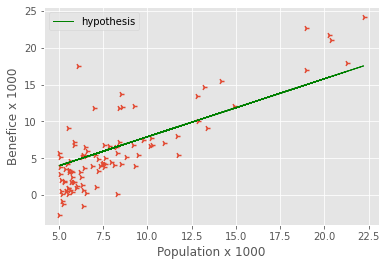

In [24]:
plt.scatter(X[:,[1]], y,marker="4")
plt.plot(X[:,[1]], y_hat, color='green', linewidth=1,label="hypothesis")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

This model, obviously, does not fit our data. As highlighted by the blue lines connecting dots with the red line, the Hypothesis *“touches”* some of the y values, but the rest of the $h_{\theta}$ vector is far from the minimum. So we are tempted to guess which $\theta$ could predict $y$ when setting with different values. We could choose $\theta$ “by trial and error” to minimize all the distances between the Hypothesis and y. 

To accomplish this goal, we can calculate the Cost Function for our model.

### 💱 Cost function

This function will help us compute $J(\theta_0,\theta_1)$.

We'll be using the MSE defined at the beginning.

In [25]:
def mean_squared_error(y_true,y_hat):
  loss = y_hat - y_true
  m = len(y_true) 
  # 1/2*m * sum((h - y)^2)
  return 1/(2*m) * np.sum(loss ** 2)

In [26]:
def get_cost(X,y,theta):   
           
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta 
    y_hat = h_theta(X,theta)
    
    # Calculate the Cost J
    J = mean_squared_error(y,y_hat)
    
    return J

In [27]:
# Try some random theta, and produce a table with 
# random theta values and their relative J
import random 

print("[t_0 \t\t   t_1]", " \t   J") # write an header

for x in range(10):
    theta_0 = random.random()
    theta_1 = random.random()  
    theta = np.asarray([theta_0, theta_1]).astype(float)
    # Calculate J and print the table
    print(theta, get_cost(X, y, theta))

[t_0 		   t_1]  	   J
[0.64135397 0.51895002] 8.308284893655241
[0.02078557 0.72569637] 6.100845303073067
[0.00844558 0.63012958] 7.062497519673588
[0.22416224 0.16553141] 21.393004956391714
[0.04236672 0.63374878] 6.990695624190198
[0.40667311 0.42730018] 10.71530505854026
[0.83850408 0.3848079 ] 11.048978704390455
[0.54100532 0.25640391] 16.117263894947506
[0.2267559  0.98596617] 7.754243718141976
[0.79302323 0.73236633] 6.481961781627286


After 10 runs on randomly selected $\theta$, the behavior of $J$ is unpredictable. Moreover, there is no way to guess $J$ basing on $\theta$.

## 🎢 Gradient Descent Implementation
- The algorithm will repeat until it will converge (will stop when reaches maximum number of iterations or very small derivatives).

- $\theta$ updating has to be simultaneous.

- We will use the functions deduced at <a href="#gradient">this section</a>.


In [28]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features) 
  else:
    return np.zeros(n_features)

As a reminder, $\theta^T  x$ is equivalent to $X  \theta $ where $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [29]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  """
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  """
  start = time.time()
  # Number of training examples
  m = len(X)  
                     
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  for i in range(num_iters):
      # Step 1 : Calculate h = X * theta
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * (1/2*m) * np.sum(np.multiply(X.T, error), axis=1)
      
      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)
      
      cost = get_cost(X,y,theta)
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - t_0: {:.4f} - t_1: {:.4f}'.format(i+1,num_iters,cost,theta[0],theta[1]))
          
  print('Time spent: %0.2fs' % (time.time()-start))  
  return theta, theta_history, J_history,gd_iterations_df
    

# 💰 Let's try on our data

In [30]:
theta = initialize_theta(X.shape[1],is_random=False)

In [31]:
theta

array([0., 0.])

Let's compute the initial cost.

In [32]:
initial_cost = get_cost(X,y,theta=theta)
print('initial_cost : ',initial_cost)

initial_cost :  32.072733877455676


Let's play around with some parameters.

In [33]:
iterations = 1500
my_alpha = 0.01

In [34]:
theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta=theta,num_iters=iterations,alpha=my_alpha)

<ipython-input-25-d86dea8ead49>:5: RuntimeWarning: overflow encountered in square
  return 1/(2*m) * np.sum(loss ** 2)
C:\Users\kawaremu\anaconda\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-29-9214d5a5bb48>:33: RuntimeWarning: invalid value encountered in subtract
  theta = np.subtract(theta, theta_new)


Time spent: 1.22s


In [35]:
theta

array([nan, nan])

🛑 Oops, seems like these parameters aren't helping, and the function diverged. Let's change them and re-initialize $\theta$ to zero.

In [36]:
theta = initialize_theta(X.shape[1],is_random=False)

In [37]:
iterations = 2000
my_alpha = 0.0000001

In [38]:
theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta,num_iters=iterations,alpha=my_alpha)

Time spent: 1.56s


In [39]:
gd_iterations_df

,iteration,cost
0,0.0,30.088018
1,1.0,28.253861
2,2.0,26.558838
3,3.0,24.992395
4,4.0,23.544777
...,...,...
1995,1995.0,5.502590
1996,1996.0,5.502416
1997,1997.0,5.502242
1998,1998.0,5.502068


We end up with some new values for $\theta$ vector. Let's plot the graph and see our line.

In [40]:
theta

array([-0.54048476,  0.85595775])

In [41]:
y_pred = h_theta(X,theta)

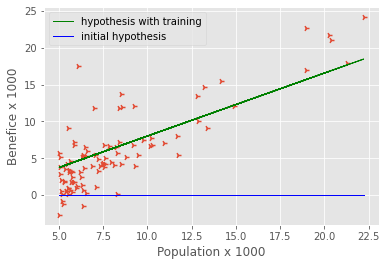

In [42]:
plt.scatter(X[:,[1]], y,marker="4")
plt.plot(X[:,[1]], y_pred, color='green', linewidth=1,label="hypothesis with training")
plt.plot(X[:,[1]], h_theta(X,[0,0]), color='blue', linewidth=1,label="initial hypothesis")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

### 📑 Cost History

Let's plot the cost function

Text(0, 0.5, 'Cost (J)')

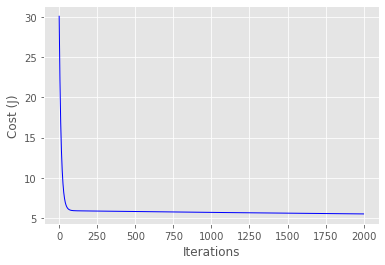

In [43]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")

Let's plot the theta history

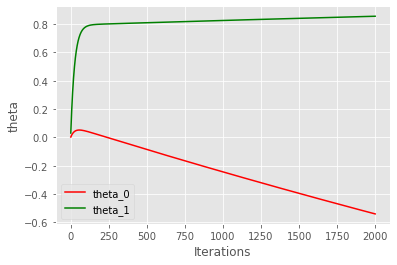

In [44]:
theta_0 = np.asarray(theta_history)[:,[0]]
theta_1 = np.asarray(theta_history)[:,[1]]

plt.plot(theta_0[0:len(theta_0)], color='red', label='theta_0')
plt.plot(theta_1[0:len(theta_1)], color='green', label='theta_1')
plt.xlabel("Iterations")
plt.ylabel("theta")
plt.legend()

In [45]:
theta

array([-0.54048476,  0.85595775])

Text(0.5, 0, 'J')

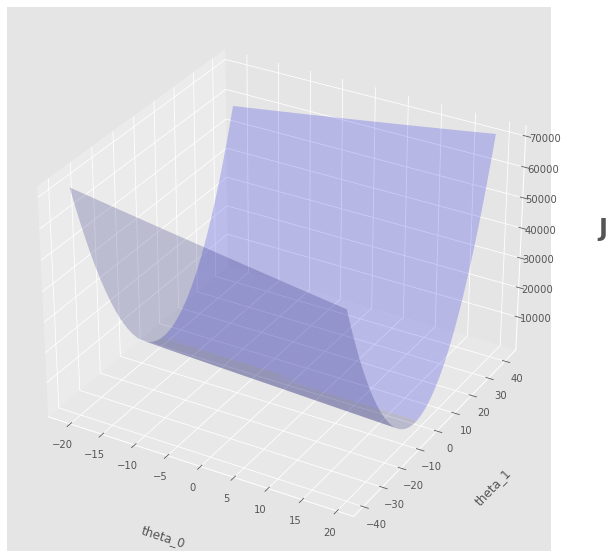

In [46]:
from mpl_toolkits.mplot3d import Axes3D
ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([get_cost(X, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.set_xlabel('theta_0', labelpad=30, fontsize=12)
ax.set_ylabel('theta_1', labelpad=30, fontsize=12)
ax.set_zlabel('J', labelpad=30, fontsize=24, fontweight='bold')

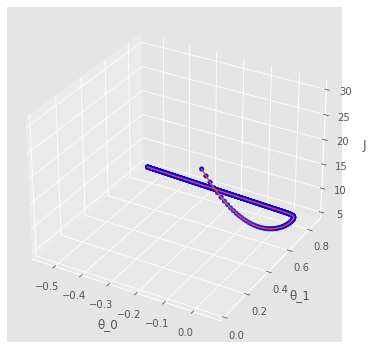

In [47]:
cost_history = np.array(J_history)
fig = plt.figure(figsize=(6,15))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = theta_0.reshape(-1,)
yline = theta_1.reshape(-1,)
zline = cost_history
ax.plot3D(xline, yline, zline)
ax.scatter3D(xline, yline, zline, c='blue', cmap='Greens')

# Set some labels
ax.set_xlabel('θ_0')
ax.set_ylabel('θ_1')
ax.set_zlabel('J')
plt.show()

# 🔮 Predictions

Let's predict some values for a given population (35000 and 70000 inhabitants).

In [49]:
population1 = np.array([3.5]).reshape(-1,1)
predict1 = h_theta(population1,theta)
print('For {} inhabitants -> benefice would be : {:.2f}'.format(population1[0][0]*1000,predict1[0]*1000))

For 3500.0 inhabitants -> benefice would be : 1104.16


In [50]:
population2 = np.array([7.0]).reshape(-1,1)
predict2 = h_theta(population2,theta)
print('For {} inhabitants -> benefice would be : {:.2f}'.format(population2[0][0]*1000,predict2[0]*1000))

For 7000.0 inhabitants -> benefice would be : 2208.31


# 📊 Multivariables Linear Regression

In [51]:
df_houses_multi = pd.read_csv('data/house_multi.csv')

In [ ]:
df_houses_multi.head()

For this dataset, we would like to predict the price of a house from : 
- its surface,
- its number of rooms

In [ ]:
X = df_houses_multi[['surface','rooms_nbr']].values


Let's add a column of ones for $\theta_{0}$

In [ ]:
intercept = np.ones(len(y))
X = np.vstack((intercept, X.T)).T

In [ ]:
X[:5]

In [ ]:
y = df_houses_multi['price'].values
y[:5]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
plt.scatter(X[:,1], y, alpha=0.3,cmap='viridis')
plt.xlabel('Surface (m²)')
plt.ylabel('Price')

In [ ]:
plt.scatter(X[:,2], y, alpha=0.3,cmap='PiYG')
plt.xlabel('Number of rooms')
plt.ylabel('Price')

# 🧹 Data Preprocessing

 Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

<center><img src="https://miro.medium.com/max/672/1*NSmq-HYqbK0XdNi_pL3JIg.png" width=700></center>



### 🔍 Scaling : Data Transformation

*Feature scaling* is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.


* **Methods for Scaling**: 
  - Normalization
  - Standardization
  - Scaling to unit length

#### 📏 Normalization

It is the method of scaling the data so that it can be represented in a smaller range. Example ranging from -1.0 to 1.0.

#### 📐 Standartization 

*Feature standardization* makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula :

$$ 

x^{'} = \frac{x - \bar{x}}{\sigma}
$$

$$
\bar{x}=0
$$

In [ ]:
theta = initialize_theta(n_features=X.shape[1],is_random=False)

In [ ]:
theta

In [ ]:
initial_cost = get_cost(X,y,theta)
initial_cost

In [ ]:
iterations = 2000
alpha = 0.00001

In [ ]:
theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta,num_iters=iterations,alpha=my_alpha)

In [ ]:
theta

In [ ]:
gd_iterations_df

There is a problem is our cost function, it's diverging.

I believe it's because our data are not scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True)

In [ ]:
scaler.fit(X)

In [ ]:
x_scaled = scaler.transform(X)

In [ ]:
theta = initialize_theta(n_features=X.shape[1],is_random=False)

In [ ]:
theta, theta_history, J_history,gd_iterations_df = gradient_descent(x_scaled, y, theta,num_iters=iterations,alpha=my_alpha)

In [ ]:
theta

# 🔬 Comparison with scikit-learn


## Single-Feature Linear Regression

In [52]:
from sklearn import linear_model

In [53]:
df_houses = pd.read_csv('data/houses.csv')
X = df_houses['population'].values.reshape(-1,1)
y = df_houses['benefice'].values

In [54]:
X_reshaped = X.reshape(-1,1)

In [55]:
reg = linear_model.LinearRegression()
reg.fit(X_reshaped,y)

LinearRegression()

In [57]:
reg.intercept_,reg.coef_

(-3.8957808783118537, array([1.19303364]))

In [58]:
y_pred_skl = reg.predict(X)

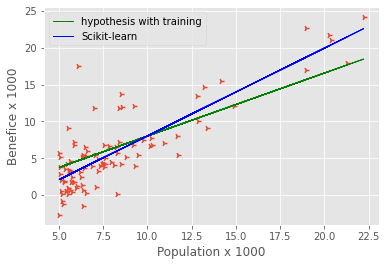

In [60]:
plt.scatter(X, y,marker="4")
plt.plot(X, y_pred, color='green', linewidth=1,label="hypothesis with training")
plt.plot(X, y_pred_skl, color='blue', linewidth=1,label="Scikit-learn")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

# 📚Ressources

1. *Gradient Descent Algorithm step by step*,https://towardsdatascience.com/complete-step-by-step-gradient-descent-algorithm-from-scratch-acba013e8420
2. *Gradient Descent From Scratch*, https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc
3. *Gradient Descent Algorithm, a deep dive*,https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
4. *Gradient Descent Algorithm in Python from Scratch*,https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f
5. *Cost Function and Gradient Descent*, https://towardsdatascience.com/machine-leaning-cost-function-and-gradient-descend-75821535b2ef
6. *Linear Regression with one or more variables*,https://towardsdatascience.com/machine-learning-for-biomedical-data-linear-regression-7d43461cdfa9
7. *When to perform a Feature Scaling?*, https://www.atoti.io/articles/when-to-perform-a-feature-scaling/#:~:text=Feature%20scaling%20is%20a%20method,during%20the%20data%20preprocessing%20step.